# Hubble's Law Demo
## F23 Advanced Python Workshop
### 10/17/23
### Author: Brandon Radzom

In [58]:
# import necessary packages

# data analysis packages
import numpy as np
# plotting packages
import matplotlib.pyplot as plt
import matplotlib as mpl
# data fitting package
from scipy.optimize import curve_fit
# astro packages
from astropy.coordinates import SkyCoord
import astropy.units as u
# optional figure settings
mpl.rcParams['figure.dpi']=100
%config InlineBackend.figure_format='svg'

### Record data from Hubble's famous 1929 paper
Paper link: https://www.pnas.org/doi/10.1073/pnas.15.3.168. All data is taken directly from Table 1.

In [59]:
# first 'read in' data 
# object names
obj_names_Hubble = ['S. Mag.','L. Mag.','NGC 6822','NGC 598','NGC 221','NGC 224','NGC 5457','NGC 4736','NGC 5194','NGC 4449',
                   'NGC 4214','NGC 3031','NGC 3627','NGC 4826','NGC 5236','NGC 1068','NGC 5055','NGC 7331','NGC 4258','NGC 4151','NGC 4382',
                   'NGC 4472','NGC 4486','NGC 4649']
# object distances
D_Hubble = [0.032,0.034,0.214,0.263,0.275,0.275,0.45,0.5,0.5,0.63,0.8,0.9,0.9,0.9,0.9,1.0,1.1,
            1.1,1.4,1.7,2.0,2.0,2.0,2.0]
# object recessional velocities
v_Hubble = [170,290,-130,-70,-185,-220,200,290,270,200,300,-30,650,150,500,920,450,500,500,960,
            500,850,800,1090]
print('There are',len(obj_names_Hubble),'galaxies with measured redshifts from Hubble 1929.')

There are 24 galaxies with measured redshifts from Hubble 1929.


Text(0.5, 1.0, 'Hubble (1929) Data')

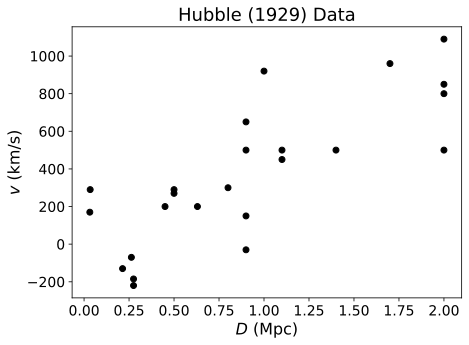

In [60]:
# plot the data

fig=plt.figure(figsize=(7,5))
plt.tight_layout()
plt.plot(D_Hubble,v_Hubble,color='black',marker='o',alpha=1.0, linestyle='none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r'$v$ (km/s)',fontsize=16)
plt.xlabel(r'$D$ (Mpc)',fontsize=16)
plt.title(r"Hubble (1929) Data",fontsize=18)

### Fit the data from Hubble 1929 to compute $H_0$

In [61]:
# this function defines the Hubble expansion
def Hubble_line(D, H0):
    return H0*D

In [62]:
# want to fit a line to the data to derive the Hubble constant, using curve_fit function
popt, pcov = curve_fit(Hubble_line, D_Hubble, v_Hubble, p0=[500])
H0_fit = popt[0]
H0_error = np.sqrt(pcov[0][0]) # standard error from the fit
print('We have fit the Hubble constant to be H0 =',H0_fit,'+-',H0_error,'km/s/Mpc.')

# define distance grid for plotting line
D_grid = np.linspace(0,2.2,1000)
v_fit = Hubble_line(D_grid, H0_fit)

We have fit the Hubble constant to be H0 = 423.93732323146435 +- 42.15414296187176 km/s/Mpc.


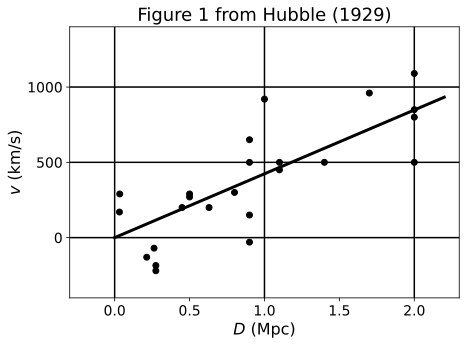

In [63]:
fig=plt.figure(figsize=(7,5))
plt.tight_layout()
plt.plot(D_Hubble,v_Hubble,color='black',marker='o',alpha=1.0, linestyle='none')
# plot the Hubble law we fit
plt.plot(D_grid,v_fit,color='black',linewidth=3,alpha=1.0,linestyle='solid')
plt.xticks(fontsize=14)
# set the yticks to match those from the 1929 paper
plt.yticks(ticks=[0,500,1000],fontsize=14)
# plt.legend(fontsize=14)
plt.ylabel(r'$v$ (km/s)',fontsize=16)
plt.xlabel(r'$D$ (Mpc)',fontsize=16)
# set x and y-axis boundaries to be similar to 1929 paper
plt.ylim(-400,1400)
plt.xlim(-0.3,2.3)
# add in a grid manually
plt.axvline(0, color='k')
plt.axvline(1, color='k')
plt.axvline(2, color='k')
plt.axhline(0, color='k')
plt.axhline(500, color='k')
plt.axhline(1000, color='k')
plt.title(r'Figure 1 from Hubble (1929)',fontsize=18)
# let's save this figure
plt.savefig('v_D_Hubble1929.jpg', bbox_inches='tight')

### Use modern distances from COSMICFLOWS-3 to re-fit $H_0$
We've reproduced Hubble's famous result from 1929, but you may note that the Hubble constant we derived is roughly an order of magnitude too large than the true value known today ($H_0\approx 70 \, \mathrm{km/s/Mpc}$). This is mostly due to the fact that the extragalactic distances adopted back then were quite inaccurate. Now, we've developed a much more robust cosmic distance ladder that allows us to compute these distances with high accuracy. COSMICFLOWS is an extragalactic distance database available online, the 3rd version of which contains high-quality distances to nearly 18,000 galaxies (see Tully et al. 2016: https://iopscience.iop.org/article/10.3847/0004-6256/152/2/50).

Let's read in data from COSMICFLOWS-3, contained within the cosmicflows3.tsv file, and update the distances to Hubble's galaxies. This will require us to perform a $\textit{cross-match}$ between the two data sets, which we can do using the Right Ascension, Declination coordinates of the galaxies from the Hubble 1929 paper and with help from the Python package $\texttt{astropy}$. Note that there were a few cases where the cross-match did not work as intended where I had to instead look up the new velocity and distance values for these galaxies manually on the NASA Extragalactic Database (NED). 

In [64]:
# load in Cosmicflows-3 data
cosmicflow_3 = np.loadtxt('cosmicflows3.tsv',skiprows=51)
print('Number of sources in catalog:',len(cosmicflow_3))
# get Right Ascension (ra), Declination (dec), distances (d), velocities (vH)
allCF3_ra = np.zeros(len(cosmicflow_3))
allCF3_dec = np.zeros(len(cosmicflow_3))
allCF3_d = np.zeros(len(cosmicflow_3))
allCF3_vH = np.zeros(len(cosmicflow_3))
for eachsrc in range(len(cosmicflow_3)):
    allCF3_ra[eachsrc] = cosmicflow_3[eachsrc][0]
    allCF3_dec[eachsrc] = cosmicflow_3[eachsrc][1]
    allCF3_d[eachsrc] = cosmicflow_3[eachsrc][3]
    allCF3_vH[eachsrc] = cosmicflow_3[eachsrc][5]

# Right Ascension and Declination for NGC objects from Hubble (1929), found using NED
# NED = NASA Extragalactic Database
new_Hubble_ra = np.asarray([13.186588,80.893860,296.240592,23.462042,10.674300,10.684793,
                210.802267,192.721088,202.469629,187.046261,183.913208,148.888221,
                170.062351,194.181837,204.253958,40.669629,198.955542,339.266724,
                184.739602,182.635745,186.350451,187.444841,187.705930,190.916564]) # units: decimal degrees
new_Hubble_dec = np.asarray([-72.828599,-69.756126,-14.803434,30.660222,40.865287,41.269065,
                 54.348950,41.120458,47.195172,44.093630,36.326889,69.065295,
                 12.991538,21.682970,-29.865417,-0.013281,42.029278,34.415519,
                 47.303973,39.405730,18.191487,8.000476,12.391123,11.552706]) # units: decimal degrees


Number of sources in catalog: 17669


In [65]:
# now cross-match the targets from Hubble with the data from CF3
c = SkyCoord(ra=new_Hubble_ra*u.degree, dec=new_Hubble_dec*u.degree)
catalog = SkyCoord(ra=allCF3_ra*u.degree, dec=allCF3_dec*u.degree)
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
Hubble_is = idx # length c, corresponds to matching index of catalog

In [66]:
# now grab d, vH values using the matched array indicies (Hubble_is)
CF3_Hubble_d = np.zeros(len(Hubble_is))
CF3_Hubble_vH = np.zeros(len(Hubble_is))
for eachi in range(len(Hubble_is)):
    CF3_Hubble_d[eachi] = allCF3_d[Hubble_is[eachi]]
    CF3_Hubble_vH[eachi] = allCF3_vH[Hubble_is[eachi]]
    if eachi == 8: # Make a manual change using NED since I noticed it didn't match right
        allCF3_d[Hubble_is[eachi]] = 4.9
        allCF3_vH[Hubble_is[eachi]] = 464


# from NED, manually update a few velocity and distances:
CF3_Hubble_vH[-5] = 997.109855 # km/s, NGC 4151
CF3_Hubble_d[-5] = 18.35

CF3_Hubble_vH[-9] = 1137.112952 # km/s, NGC 1068
CF3_Hubble_d[-9] = 13.48

CF3_Hubble_vH[-16] = 459.881695 # km/s, NGC 5194
CF3_Hubble_d[-16] = 9.34

# fit the data to re-compute the Hubble constant
popt, pcov = curve_fit(Hubble_line, CF3_Hubble_d, CF3_Hubble_vH, p0=[70])
H0_fit_CF3 = popt[0]
H0_error_CF3 = np.sqrt(pcov[0][0]) # standard error from the fit
print('With the updated CF3 data, we have fit the Hubble constant to be H0 =',H0_fit_CF3,'+-',H0_error_CF3,'km/s/Mpc.')

# define rgrid for plotting line
dgrid = np.linspace(0,20,100000)
vH_fit = Hubble_line(dgrid, H0_fit_CF3)

With the updated CF3 data, we have fit the Hubble constant to be H0 = 61.81130063693487 +- 3.9592837001342427 km/s/Mpc.


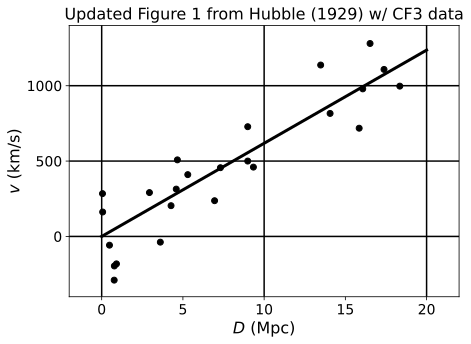

In [67]:

fig=plt.figure(figsize=(7,5))
plt.tight_layout()
plt.plot(CF3_Hubble_d,CF3_Hubble_vH,color='black',marker='o',alpha=1.0, linestyle='none')
plt.plot(dgrid,vH_fit,color='black',linewidth=3,alpha=1.0,linestyle='solid')
plt.xticks(fontsize=14)
plt.yticks(ticks=[0,500,1000],fontsize=14)
# plt.legend(fontsize=14)
plt.ylabel(r'$v$ (km/s)',fontsize=16)
plt.xlabel(r'$D$ (Mpc)',fontsize=16)
plt.ylim(-400,1400)
# plt.xlim(-0.3,2.3)
plt.axvline(0, color='k')
plt.axvline(10, color='k')
plt.axvline(20, color='k')
plt.xlim(-2,22)
plt.axhline(0, color='k')
plt.axhline(500, color='k')
plt.axhline(1000, color='k')
plt.title(r'Updated Figure 1 from Hubble (1929) w/ CF3 data',fontsize=16)
plt.savefig('v_D_Hubble1929_updated.jpg', bbox_inches='tight')

Note that our new $H_0$ value is much closer to the accepted value of $70 \, \mathrm{km/s/Mpc}$! The remaining discrepancy between the two values is largely due to certain observational corrections/filterings we have not made. Also note that the correlation in our new updated plot is much tighter- this is reflected in the reduced error on our computed $H_0$ (just $4 \, \mathrm{km/s/Mpc}$ instead of $42 \, \mathrm{km/s/Mpc}$). We're doing modern cosmology!